In [1]:
from nodevectors import Node2Vec
import torch
from torch import optim
import torch.nn as nn
import torch.nn.functional as F

from blitz.modules import BayesianLinear
from blitz.utils import variational_estimator

import networkx as nx
from tqdm import tqdm
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

from nodevectors import Node2Vec
from karateclub import Graph2Vec, GL2Vec, WaveletCharacteristic, FeatherGraph, GeoScattering, SF

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

import warnings
# "error", "ignore", "always", "default", "module" or "once"
warnings.filterwarnings('ignore')
scaler = StandardScaler()


In [2]:
def getpredictionscore(gt, pred):
    ACC = accuracy_score(gt, pred)
    #AUC = roc_auc_score(gt, pred)
    f1_grid = precision_recall_fscore_support(gt, pred, average='macro')
    F1 = f1_grid[2]

    record_df = pd.DataFrame(data={
        #'AUC': [round(AUC, 2)],
        'F1': [round(F1, 2)],
        'ACC': [round(ACC, 2)],
    })
    print(record_df.to_string(index=False))

In [4]:
dim = 128




In [7]:
from pyod.models.pca import PCA
from pyod.models.knn import KNN

clf = PCA(contamination=0.4)
clf.fit(X_train)

y_pred = clf.predict(X_test)
y_pred_proba = [y for x, y in clf.predict_proba(X_test)]
n_errors = (y_pred != y_test).sum()
X_scores = clf.decision_scores_
print(y_pred)
print(y_test)
print(y_pred_proba)

getpredictionscore(y_test, y_pred)




[1 1 1 1 1 1 1 1 1 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 F1  ACC
1.0  1.0


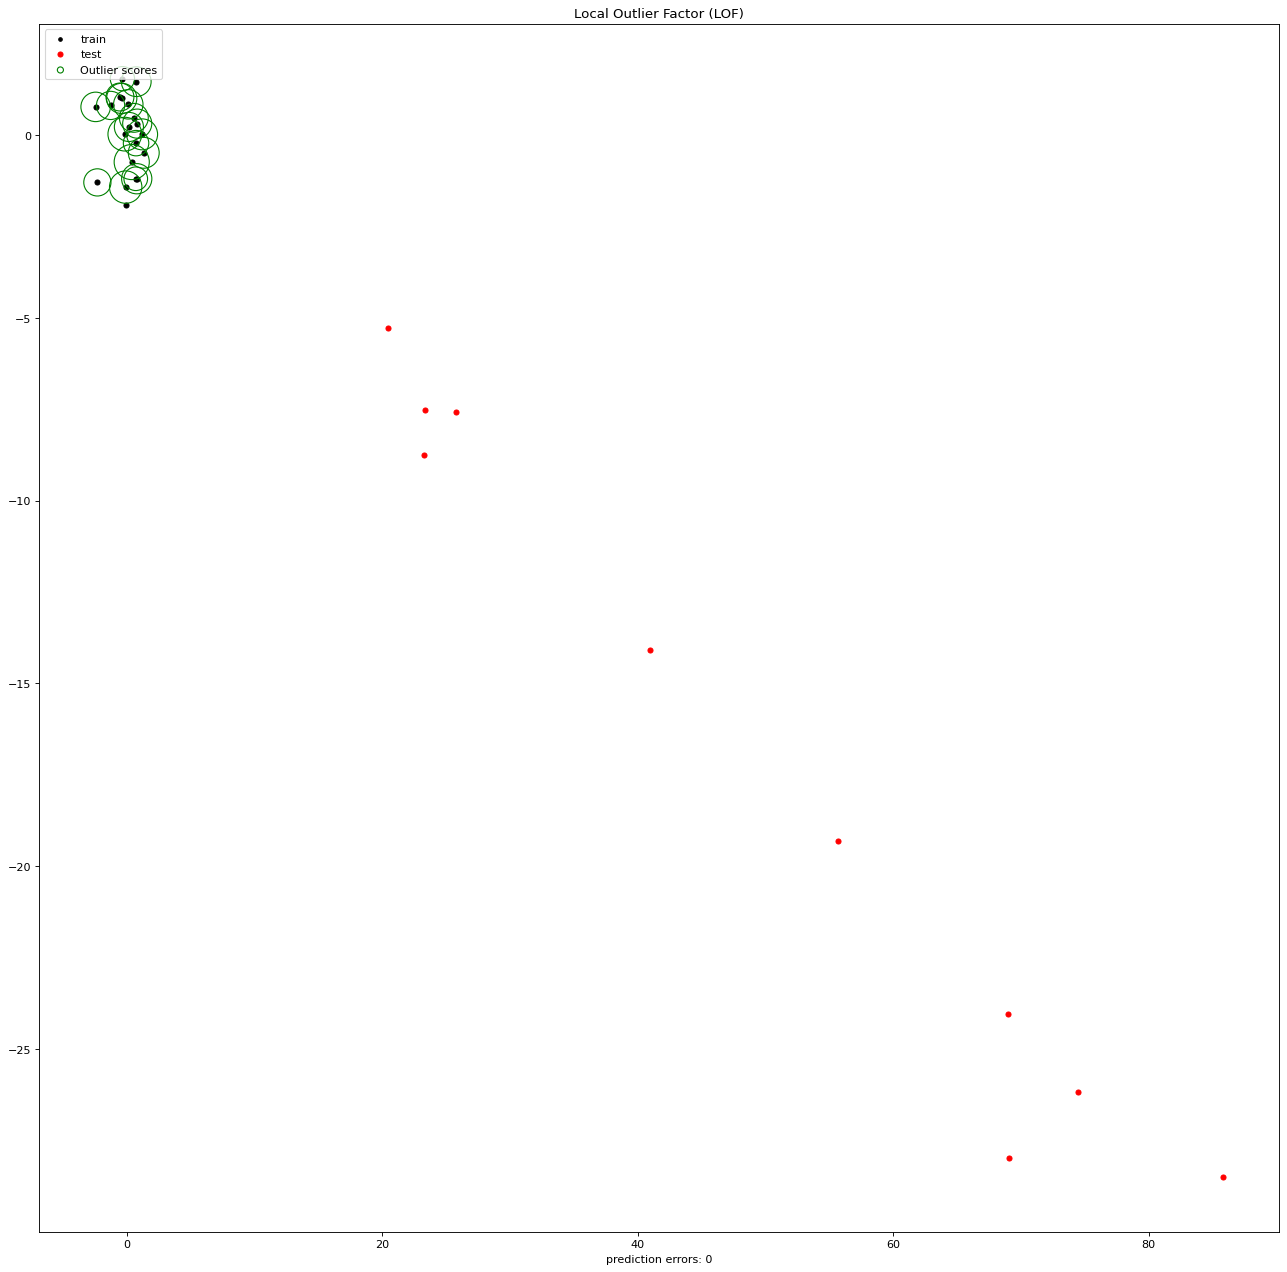

In [8]:
plt.title("Local Outlier Factor (LOF)")
plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams["figure.dpi"] = (80)
plt.scatter(X_train[:, 0], X_train[:, 1], color='k', s=20., label='train')
plt.scatter(X_test[:, 0], X_test[:, 1], color='r', s=20., label='test')

radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X_train[:, 0], X_train[:, 1], s=1000 * radius, edgecolors='g',
            facecolors='none', label='Outlier scores')

#plt.axis('tight')
# plt.xlim((-20, 20))
# plt.ylim((-20, 20))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
legend.legendHandles[2]._sizes = [30]
plt.show()
